**about this project:** </br> 
this project is to detect attack traffic from normal traffic. I used ISCX dataset as a benchmark dataset to evaluate and compare different supervised and unsupervised methods.</br>
**about ISCX dataset:**</br>
ISCX is a benchmark dataset consists of 45 features and 83000 records. 


**in the first block :** </br>
I just import useful packages and modules for this project. </br></br>
here **"sklearn"** or **"Scipy Toolkit Learn"** is a machine learning package which consists of Classification, Regression and Clustering algorithms like Gradient Boosting , SVM , K-means , DB-Scan. </br>
sklearn is so popular because it can works with science-numerical libraries in python, Scipy and Numpy very good.</br></br>
**Feature-Selector** is a library and a simple tool that is used to do dimention reduction! It uses 5 methods to detect which features should be remove! these five methods are : </br>
1- Missing Values, </br>
2- Single Unique Values, </br>
3- Collinear Features, </br>
4- Zero Importance Features, </br>
5- Low Importance Features.</br>
Also **Feature-Selector** have some methods to illustrate features and their corelations like HeatMap method. 



In [ ]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn import cluster
from sklearn import mixture
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
from sklearn.decomposition import PCA
import time
import warnings
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from feature_selector import FeatureSelector
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import jaccard_similarity_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In the block below, I just read main datasets which are in two csv files.

In [ ]:
train_data = pd.read_csv('/media/sf_shared/base/UNB_NB15_training-set.csv',
                             sep='\t', lineterminator='\r')
test_data = pd.read_csv('/media/sf_shared/base/UNB_NB15_testing-set.csv',
                             sep='\t', lineterminator='\r')

/home/arta/anaconda3/envs/bdks/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In two blocks below, I just convert csv files to excel files and save them and again I read them.

In [ ]:
"""train_data.to_excel('/media/sf_shared/base/train_edited.xlsx')
test_data.to_excel('/media/sf_shared/base/test_edited.xlsx')"""

"train_data.to_excel('/media/sf_shared/base/train_edited.xlsx')\ntest_data.to_excel('/media/sf_shared/base/test_edited.xlsx')"

In [ ]:
train_data = pd.read_excel('/media/sf_shared/base/train_edited.xlsx')

In the block below, I get unique values of string features and list them just to code nominal values later. </br>
here nominal features are : Protocols, Services, States, Attack_categories.

In [ ]:
protocols = list(train_data['proto'].unique())
services = list(train_data['service'].unique())
states = list(train_data['state'].unique())
attacks = list(train_data['attack_cat'].unique())
# now we have all string values in a list that can be cody

in four next blocks I just assigned a number to each of the items in unique lists. every nominal feature has a for loop.  

In [ ]:
for item in protocols:
    train_data.loc[train_data['proto'] == item, 'proto'] = protocols.index(item)
    """test_data.loc[test_data['proto'] == item, 'proto'] = protocols.index(item)"""

train_data['proto'].fillna(len(protocols)-1, inplace = True)
"""test_data['proto'].fillna(len(protocols)-1, inplace = True)"""

In [ ]:
for item in services:
    train_data.loc[train_data['service'] == item, 'service'] = services.index(item)
    """test_data.loc[test_data['service'] == item, 'service'] = services.index(item)"""

train_data['service'].fillna(len(services)-1, inplace = True)
"""test_data['service'].fillna(len(services)-1, inplace = True)"""

In [ ]:
for item in states:
    train_data.loc[train_data['state'] == item, 'state'] = states.index(item)
    """test_data.loc[test_data['state'] == item, 'state'] = states.index(item)"""

train_data['state'].fillna(len(states)-1, inplace = True)
"""test_data['state'].fillna(len(states)-1, inplace = True)"""

In [ ]:
for item in attacks:
    train_data.loc[train_data['attack_cat'] == item, 'attack_cat'] = attacks.index(item)
    """test_data.loc[test_data['attack_cat'] == item, 'attack_cat'] = attacks.index(item)"""

train_data['attack_cat'].fillna(len(states)-1, inplace = True)
"""test_data['attack_cat'].fillna(len(states)-1, inplace = True)"""

in two blocks below, I just save these preprocessed datasets in new excel files and read them again. 

In [ ]:
"""train_data.to_excel('/media/sf_shared/base/replaced/train.xlsx')
test_data.to_excel('/media/sf_shared/base/replaced/test.xlsx')"""

In [ ]:
train_data = pd.read_excel('/media/sf_shared/base/replaced/train.xlsx')

In this project I used Standard_Scaler for clustering tasks and so as to do unsupervised learning, I removed labels and attack_categories. 

In [ ]:
std_scaler = preprocessing.StandardScaler()
train_withlabel = train_data[['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']]
train_no_liac = train_data[['dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports']]
train = train_no_liac.reset_index()
train = np.array(train)
scaled_train = std_scaler.fit_transform(train)

In the next block, I saved True_labels of dataset in a numpy array to use them in next processes.</br>
Also I used FeatureSelector for parts of preprocessing.

In [ ]:
labels_true = np.array(train_data['label'])
fs = FeatureSelector(data = train_no_liac, labels = labels_true)

To find features that are correlated more than correlation threshold: 

/home/arta/anaconda3/envs/bdks/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


5 features with a correlation magnitude greater than 0.97.



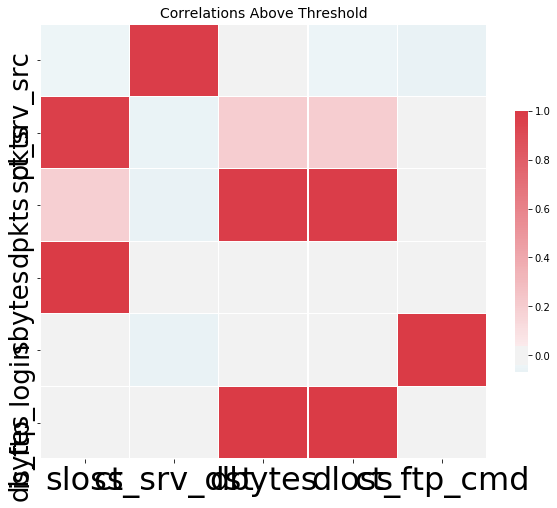

In [ ]:
fs.identify_collinear(correlation_threshold = 0.97)
fs.plot_collinear()

In next block I get the schema of these five features :</br>

In [ ]:
collinear_features = fs.ops['collinear']
fs.record_collinear.head()

,corr_feature,corr_value,drop_feature
0,dpkts,0.976419,dbytes
1,spkts,0.973644,sloss
2,sbytes,0.995027,sloss
3,dpkts,0.981506,dloss
4,dbytes,0.997109,dloss


Next block I show the correlation of all of the features in one heatmap:

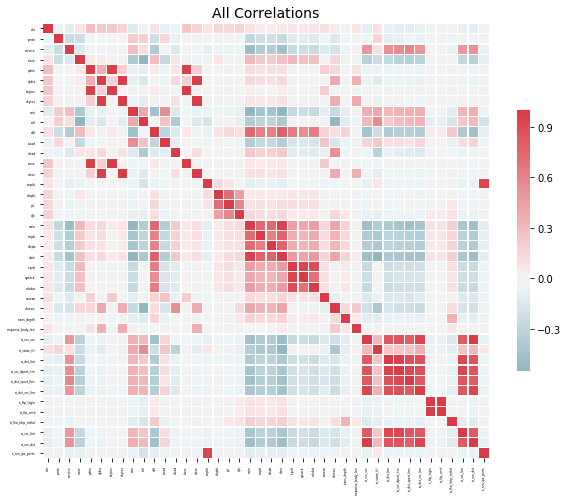

In [ ]:
fs.plot_collinear(plot_all=True)

In next block I just check if there is a single_value feature in dataset.

0 features with a single unique value.



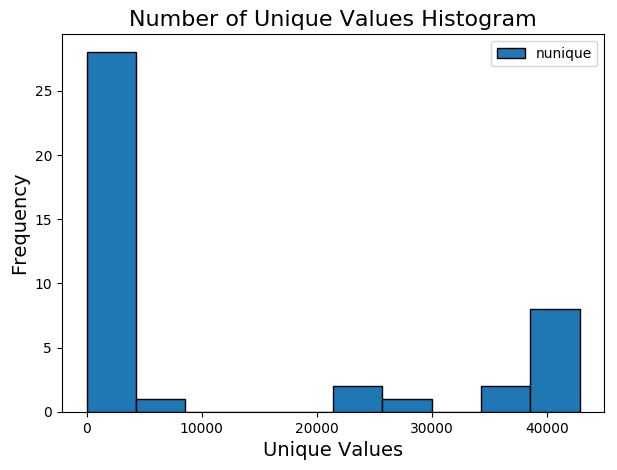

In [ ]:
fs.identify_single_unique()
fs.plot_unique()

In block below, I find the lowest important features with a model based on tree or gradient-boosting method and I will remove these features.

Training Gradient Boosting Model

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[991]	valid_0's auc: 0.998472	valid_0's binary_logloss: 0.0468188
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[991]	valid_0's auc: 0.998401	valid_0's binary_logloss: 0.0504066
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[990]	valid_0's auc: 0.998164	valid_0's binary_logloss: 0.0511267
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[985]	valid_0's auc: 0.998557	valid_0's binary_logloss: 0.0461468
Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[955]	valid_0's auc: 0.998298	valid_0's binary_logloss: 0.0491685
Training until validation scores don't improve for 100 rounds.
Did not meet early

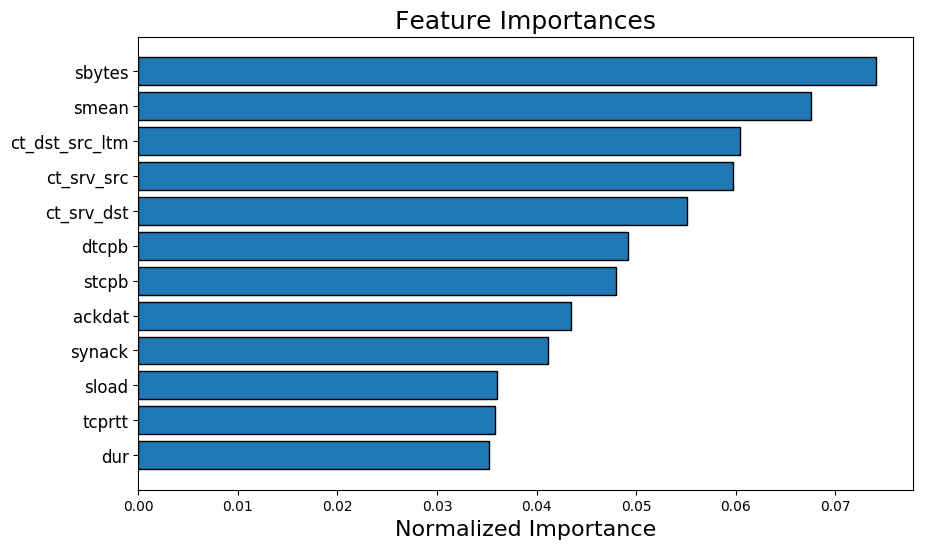

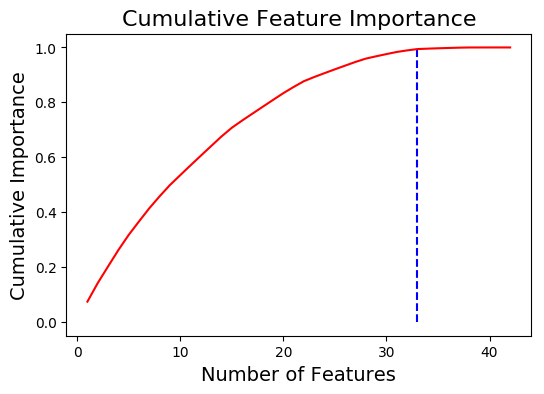

33 features required for 0.99 of cumulative importance


In [ ]:
fs.identify_zero_importance(task = 'classification', eval_metric = 'auc', 
                            n_iterations = 10, early_stopping = True)
fs.plot_feature_importances(threshold = 0.99, plot_n = 12)

Also cumulative mode is used to check how many features are required to have the importance of 0.99 (or any other values).

In [ ]:
fs.identify_low_importance(cumulative_importance = 0.99)

32 features required for cumulative importance of 0.99 after one hot encoding.
10 features do not contribute to cumulative importance of 0.99.



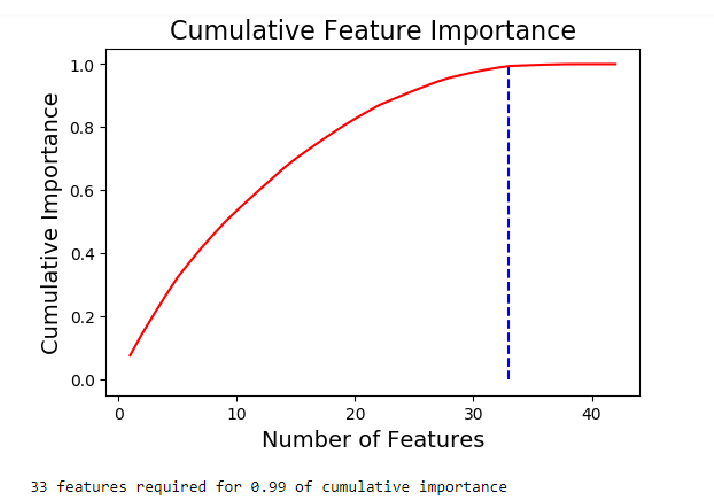

In [ ]:
train_removed_all = fs.remove(methods = 'all', keep_one_hot=False)

['low_importance', 'single_unique', 'zero_importance', 'collinear'] methods have been run

Removed 14 features including one-hot features.


In this project I used standard_scaler for clustering and minMaxScaler for classification.

In [ ]:
#this block responsible for connecting previous feature selection task to algorithms
#the below line put new data set to algorithms input
scaled_train = std_scaler.fit_transform(train_removed_all)
#if you dont want to use result of previous tasks just comment above line and uncomment
#line below
"""scaled_train = std_scaler.fit_transform(train)"""

'scaled_train = std_scaler.fit_transform(train)'

Here I used PCA for all of the clustering models. I consider 10 features as principal components! </br>
then I extract some information about these clustering algorithms. For example I compute Connectivity which is very time consuming. </br>
Line (26 to 41) : </br> 
I just define instances of different clustering algorithms. </br>
Line (44 to 54) : </br>
I just create a dictionary structure of algorithms and algorithm's names.</br>
Line (56 to 88) : </br>
in a ForLoop - for each algorithm I just run it and estimete labels and compute different metrics. 

In [ ]:
#----------------------------------
# Here we use PCA for dimention reduction you can change number of components
# or simply delete this section to use main data
pca = PCA(n_components=10)
scaled_train = pca.fit_transform(scaled_train)

labels_true = np.array(train_data['label'])
bandwidth = 1
n_clusters = 2
eps = 0.3
damping = 0.9
preference = -200
quantile = 0.3
n_neighbors = 10
# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(scaled_train, quantile=quantile)

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
   scaled_train, n_neighbors=n_neighbors, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)


ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
k_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(
        n_clusters=n_clusters, linkage='ward',
        connectivity=connectivity)
spectral = cluster.SpectralClustering(
        n_clusters=n_clusters, eigen_solver='arpack',
        affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=eps)
affinity_propagation = cluster.AffinityPropagation(
        damping=damping, preference=preference)
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=n_clusters, connectivity=connectivity)
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(
        n_components=n_clusters, covariance_type='full')


clustering_algorithms = (
        ('MiniBatchKMeans', k_means),
        
        ('MeanShift', ms),
        ('SpectralClustering', spectral),
        ('Ward', ward),
        ('AgglomerativeClustering', average_linkage),
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

labels_true = labels_true.astype(str)
for name, algorithm in clustering_algorithms:
    t0 = time.time()

# catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(scaled_train)
        print(name + " trained")
        
    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_.astype(np.int)
    else:
        labels = algorithm.predict(scaled_train)
    
    labels = np.array(labels)
    print("Homogeneity of " + name + ": " +
          str(metrics.homogeneity_score(labels_true, labels)))
    print("Completeness of " + name + ": " +
          str(metrics.completeness_score(labels_true, labels)))
    print("V_measure of " + name + ": " +
          str(metrics.v_measure_score(labels_true, labels)))

MiniBatchKMeans trained
Homogeneity of MiniBatchKMeans: 0.15862507773644724
Completeness of MiniBatchKMeans: 0.08383833586282664
V_measure of MiniBatchKMeans: 0.10969789087861855
MeanShift trained
Homogeneity of MeanShift: 0.01890226815735295
Completeness of MeanShift: 0.053236800892340445
V_measure of MeanShift: 0.027898787704438856
SpectralClustering trained
Homogeneity of SpectralClustering: 0.05506862070032503
Completeness of SpectralClustering: 0.11785593211278433
V_measure of SpectralClustering: 0.07506352935105187


/home/arta/anaconda3/envs/bdks/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 930 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Ward trained
Homogeneity of Ward: 0.1684498624231471
Completeness of Ward: 0.11666794914481128
V_measure of Ward: 0.13785669772475737


/home/arta/anaconda3/envs/bdks/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:426: UserWarning: the number of connected components of the connectivity matrix is 930 > 1. Completing it to avoid stopping the tree early.
  affinity=affinity)


AgglomerativeClustering trained
Homogeneity of AgglomerativeClustering: 0.00010198471645581947
Completeness of AgglomerativeClustering: 0.05695417189975827
V_measure of AgglomerativeClustering: 0.00020360484885945557
DBSCAN trained
Homogeneity of DBSCAN: 0.5296601894256845
Completeness of DBSCAN: 0.13327265725916135
V_measure of DBSCAN: 0.21296039634225394
Birch trained
Homogeneity of Birch: 0.008506314003198023
Completeness of Birch: 0.06826713704064998
V_measure of Birch: 0.015127669679339028
GaussianMixture trained
Homogeneity of GaussianMixture: 0.25303734529593547
Completeness of GaussianMixture: 0.11943433496483546
V_measure of GaussianMixture: 0.16227460318878065


the block below is exactly the previous block just I used LDA dimenstion reduction method instead PCA method.

In [ ]:
labels_true = np.array(train_data['label'])
#----------------------------------
# Here we use LDA for dimention reduction you can change number of components
# or simply delete this section to use main data
lda = LinearDiscriminantAnalysis()
scaled_train2 = lda.fit_transform(scaled_train, labels_true)


bandwidth = 1
n_clusters = 2
eps = 0.3
damping = 0.9
preference = -200
quantile = 0.3
n_neighbors = 10
# estimate bandwidth for mean shift
bandwidth = cluster.estimate_bandwidth(scaled_train2, quantile=quantile)

# connectivity matrix for structured Ward
connectivity = kneighbors_graph(
   scaled_train, n_neighbors=n_neighbors, include_self=False)
# make connectivity symmetric
connectivity = 0.5 * (connectivity + connectivity.T)


ms = cluster.MeanShift(bandwidth=bandwidth, bin_seeding=True)
k_means = cluster.MiniBatchKMeans(n_clusters=n_clusters)
ward = cluster.AgglomerativeClustering(
        n_clusters=n_clusters, linkage='ward',
        connectivity=connectivity)
spectral = cluster.SpectralClustering(
        n_clusters=n_clusters, eigen_solver='arpack',
        affinity="nearest_neighbors")
dbscan = cluster.DBSCAN(eps=eps)
affinity_propagation = cluster.AffinityPropagation(
        damping=damping, preference=preference)
average_linkage = cluster.AgglomerativeClustering(
        linkage="average", affinity="cityblock",
        n_clusters=n_clusters, connectivity=connectivity)
birch = cluster.Birch(n_clusters=n_clusters)
gmm = mixture.GaussianMixture(
        n_components=n_clusters, covariance_type='full')


clustering_algorithms = (
        ('MiniBatchKMeans', k_means),
        
        
        ('SpectralClustering', spectral),
        ('Ward', ward),
        
        ('DBSCAN', dbscan),
        ('Birch', birch),
        ('GaussianMixture', gmm)
    )

labels_true = labels_true.astype(str)
for name, algorithm in clustering_algorithms:
    t0 = time.time()

# catch warnings related to kneighbors_graph
    with warnings.catch_warnings():
        warnings.filterwarnings(
            "ignore",
            message="the number of connected components of the " +
            "connectivity matrix is [0-9]{1,2}" +
            " > 1. Completing it to avoid stopping the tree early.",
            category=UserWarning)
        warnings.filterwarnings(
            "ignore",
            message="Graph is not fully connected, spectral embedding" +
            " may not work as expected.",
            category=UserWarning)
        algorithm.fit(scaled_train2)
        print(name + " trained")
        
    t1 = time.time()
    if hasattr(algorithm, 'labels_'):
        labels = algorithm.labels_.astype(np.int)
    else:
        labels = algorithm.predict(scaled_train2)
    
    labels = np.array(labels)
    print("Homogeneity of " + name + ": " +
          str(metrics.homogeneity_score(labels_true, labels)))
    print("Completeness of " + name + ": " +
          str(metrics.completeness_score(labels_true, labels)))
    print("V_measure of " + name + ": " +
          str(metrics.v_measure_score(labels_true, labels)))

MiniBatchKMeans trained
Homogeneity of MiniBatchKMeans: 0.2970324865187728
Completeness of MiniBatchKMeans: 0.13598266519705704
V_measure of MiniBatchKMeans: 0.18655822553497517
SpectralClustering trained
Homogeneity of SpectralClustering: 0.0007800465989703202
Completeness of SpectralClustering: 0.06536888167559443
V_measure of SpectralClustering: 0.0015416961441277782


/home/arta/anaconda3/envs/bdks/lib/python3.5/site-packages/sklearn/cluster/hierarchical.py:193: UserWarning: the number of connected components of the connectivity matrix is 930 > 1. Completing it to avoid stopping the tree early.
  affinity='euclidean')


Ward trained
Homogeneity of Ward: 0.29735273841236315
Completeness of Ward: 0.13906886645485644
V_measure of Ward: 0.1895071545820295


In [ ]:
#Now we start classification task here from the data after feature selection
#take a look at data
train_removed_all.head()

,dur,proto,service,spkts,dpkts,sbytes,rate,sttl,sload,dload,...,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm
0,0.000011,0,0,2,0,496,90909.0902,254,180363632.0,0.0,...,0.0,248,0,0,2,1,1,1,2,1
1,0.000008,0,0,2,0,1762,125000.0003,254,881000000.0,0.0,...,0.0,881,0,0,2,1,1,1,2,1
2,0.000005,0,0,2,0,1068,200000.0051,254,854400000.0,0.0,...,0.0,534,0,0,3,1,1,1,3,1
3,0.000006,0,0,2,0,900,166666.6608,254,600000000.0,0.0,...,0.0,450,0,0,3,2,2,1,3,2
4,0.000010,0,0,2,0,2126,100000.0025,254,850400000.0,0.0,...,0.0,1063,0,0,3,2,2,1,3,2


In [ ]:
train_removed_all.describe()

,dur,proto,service,spkts,dpkts,sbytes,rate,sttl,sload,dload,...,ackdat,smean,dmean,response_body_len,ct_srv_src,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm
count,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,82332.000000,8.233200e+04,8.233200e+04,...,82332.000000,82332.000000,82332.000000,8.233200e+04,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,1.006756,8.811216,1.901739,18.666472,17.545936,7.993908e+03,8.241089e+04,180.967667,6.454902e+07,6.305470e+05,...,0.026669,139.528604,116.275069,1.595372e+03,9.546604,5.744923,4.928898,3.663011,7.456360,6.468360
std,4.710444,25.348181,2.642982,133.916353,115.574086,1.716423e+05,1.486204e+05,101.513358,1.798618e+08,2.393001e+06,...,0.055094,208.472063,244.600271,3.806697e+04,11.090289,8.418112,8.389545,5.915386,11.415191,8.543927
min,0.000000,0.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,...,0.000000,24.000000,0.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000008,0.000000,0.000000,2.000000,0.000000,1.140000e+02,2.860611e+01,62.000000,1.120247e+04,0.000000e+00,...,0.000000,57.000000,0.000000,0.000000e+00,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,0.014138,2.000000,0.000000,6.000000,2.000000,5.340000e+02,2.650177e+03,254.000000,5.770032e+05,2.112951e+03,...,0.000080,65.000000,44.000000,0.000000e+00,5.000000,2.000000,1.000000,1.000000,3.000000,3.000000
75%,0.719360,2.000000,6.000000,12.000000,10.000000,1.280000e+03,1.111111e+05,254.000000,6.514286e+07,1.585808e+04,...,0.048816,100.000000,87.000000,0.000000e+00,11.000000,6.000000,4.000000,3.000000,6.000000,7.000000
max,59.999989,130.000000,12.000000,10646.000000,11018.000000,1.435577e+07,1.000000e+06,255.000000,5.268000e+09,2.082111e+07,...,2.928778,1504.000000,1500.000000,5.242880e+06,63.000000,59.000000,59.000000,38.000000,63.000000,60.000000


In this block I just create a minmaxscaler to do classification and you can select PCA or LDA method arbitrary! (one of LDA or PCA is commented)

In [ ]:
#we scale the data
mscl = MinMaxScaler()
new_data = mscl.fit_transform(train_removed_all)
#due to high dimentionality of the data we use pca or lda for dimentional reduction 
#we prefer to use pca but changing to lda and opposite can be done
#number of components of pca can simply change and for lda components can be set like pca
pca = PCA(n_components=10)
new_data = pca.fit_transform(new_data)

"""lda = LinearDiscriminantAnalysis()
new_data = lda.fit_transform(new_data, labels_true)"""

'lda = LinearDiscriminantAnalysis()\nnew_data = lda.fit_transform(new_data, labels_true)'

In the block below I split train and test datasets in arbitrary ratio (here is 30% for test and 70% for train)

In [ ]:
#we split the data with a rate
x_train, x_test, y_train, y_test = train_test_split(
    new_data, labels_true, test_size=0.3, random_state=0)
#now we have train and test splited

In next five blocks I used five classification algorithms consist of: </br>
1- SVM (Support Vector Classifier)</br>
2- DecisionTree Classifier</br>
3- KNeighbors Classifier</br>
4- GaussianNaiveBayse</br>
5- MLP Classifier</br>
y_test is true labels, y_pred is the label which is predicted by model. in each block I just compare y_pred and y_test to evaluate how this model works good. 

In [ ]:
#SVM (Support Vector Classifier)
clf = SVC(gamma='auto', kernel='poly')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

print("jaccard similarity: " + str(jaccard_similarity_score(y_test, y_pred)))

             precision    recall  f1-score   support

    class 1       0.82      0.56      0.67     11124
    class 2       0.71      0.90      0.80     13576

avg / total       0.76      0.75      0.74     24700

(0.7659589759117527, 0.7299019230797754, 0.7310598636789268, None)
accuracy: 0.7464777327935223
jaccard similarity: 0.7464777327935223


In [ ]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

print("jaccard similarity: " + str(jaccard_similarity_score(y_test, y_pred)))

"""tree.export_graphviz(clf, out_file='tree.dot')"""

             precision    recall  f1-score   support

    class 1       0.89      0.89      0.89     11124
    class 2       0.91      0.91      0.91     13576

avg / total       0.90      0.90      0.90     24700

(0.9007713716864896, 0.9009705400545032, 0.9008694983351495, None)
accuracy: 0.9018218623481782
jaccard similarity: 0.9018218623481782


In [ ]:
"""from graphviz import Source
path = 'tree.dot'
s = Source.from_file(path)
s.view()"""

'tree.dot.pdf'

In [ ]:
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

print("jaccard similarity: " + str(jaccard_similarity_score(y_test, y_pred)))

             precision    recall  f1-score   support

    class 1       0.86      0.92      0.89     11124
    class 2       0.93      0.88      0.90     13576

avg / total       0.90      0.90      0.90     24700

(0.8946364358878423, 0.8979239120922617, 0.8954845051092416, None)
accuracy: 0.8959919028340081
jaccard similarity: 0.8959919028340081


In [ ]:
clf = GaussianNB()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

print("jaccard similarity: " + str(jaccard_similarity_score(y_test, y_pred)))

             precision    recall  f1-score   support

    class 1       0.70      0.69      0.70     11124
    class 2       0.75      0.76      0.75     13576

avg / total       0.73      0.73      0.73     24700

(0.7263494320536994, 0.7259907308347302, 0.726159309078872, None)
accuracy: 0.7290688259109311
jaccard similarity: 0.7290688259109311


In [ ]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(100, 100), random_state=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

target_names = ['class 1', 'class 2']
print(classification_report(y_test, y_pred, target_names=target_names))

print(precision_recall_fscore_support(y_test, y_pred, average='macro'))

print("accuracy: " + str(accuracy_score(y_test, y_pred)))

print("jaccard similarity: " + str(jaccard_similarity_score(y_test, y_pred)))

             precision    recall  f1-score   support

    class 1       0.87      0.91      0.89     11124
    class 2       0.92      0.89      0.90     13576

avg / total       0.90      0.90      0.90     24700

(0.895074920982675, 0.8978674955083923, 0.8959927990991897, None)
accuracy: 0.8965991902834008
jaccard similarity: 0.8965991902834008
